In [1]:
#importing required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [5]:
#Loading data
leads_df= pd.read_csv('Leads.csv')
leads_df0= leads_df.copy()
leads_df0.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [7]:
#Checking shape
leads_df0.shape

(9240, 37)

In [9]:
#Checking dataframe info
leads_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Checking descriptive statistics
leads_df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [13]:
# Checking for duplicate rows in our dataset
leads_df0['Lead Number'].nunique()

9240

In [15]:
# Creating a function that prints claases and their proportions for all object columns in a dataframe

def print_classes(df, exclude_col=[]):
    object_columns= df.select_dtypes(include=['O']).columns.tolist()
    if len(exclude_col) > 0:
        object_columns= list(set(object_columns) - set(exclude_col)) # Exclude a column by the column name
    for column in object_columns:
        print('*'*100)
        print('Unique Values in column: ',column)
        print('*'*100)
        print(df[column].value_counts(normalize= True, dropna= False))
        
#Checking no. of unique values in every object columns of leads_df0
print_classes(leads_df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column:  Last Notable Activity
****************************************************************************************************
Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64
***************************************

Handling 'Select' in different columns
Above we can see 'Select' is present as a class in different columns like:

Specialization
How did you hear about X Education
Lead Profile
City
As 'Select' is not a valid class for these columns, we can conclude that the 'Select' might be the default value set in the form dropdown and if the user has not select any option from the dropdown then the value remained as 'Select'. We'll replace 'Select' with NaN.

In [17]:
#Replacing 'Select' with np.nan in dataset

leads_df0.replace({'Select': np.nan}, inplace= True)
leads_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [19]:
leads_df0.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Checking columns having no variance, high missing value

In [21]:
# Checking the columns having no variance (only one unique value)

one_unique= leads_df0.nunique()== 1
no_var_cols= one_unique[one_unique].index

'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' - These columns have no missing data and have only one unique value. So, these columns have no variance and not helpful for our EDA or model buiding, hence dropping these columns.

In [23]:
#First removing the columns that have no missing value and only 1 unique value.

leads_df0.drop(no_var_cols, axis=1, inplace=True)
leads_df0.shape

(9240, 32)

In [25]:
# Checking percentage of NA value in different columns

round(leads_df0.isna().sum() * 100/ leads_df0.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Below identified columns have more than 40% missing value, we'll drop these columns.

'How did you hear about X Education' has 78.46% missing data.
'Lead Profile' has 74.19% missing data.
'Lead Quality' has 51.6% missing data.
'Asymmetrique Activity Index', 'Asymmetrique Profile Index ', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' - These columns have 45.65% missing data.

In [27]:
# Droping columns having very high missing value

high_missing_cols= ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
leads_df0.drop(high_missing_cols, axis=1, inplace=True)
leads_df0.shape

(9240, 25)

In [29]:
# Checking if any observation has more than 70% missing data

row_check= round(leads_df0.isna().sum(axis= 1) * 100/ leads_df0.shape[1], 2) > 70
row_check[row_check]

Series([], dtype: bool)

In [31]:
# coverting Lead Number into object data type

leads_df0['Lead Number']= leads_df0['Lead Number'].astype('object')

Checking categorical columns having high no. of categories
Now, We'll check all categorical column and will perform re-grouping of the classes where required. We will also impute missing values using only Business Knowledge. Any column where Statistical imputation is required, we'll perform that after EDA and Train Test split.

In [33]:
# Again Checking no. of unique values in object columns

print_classes(leads_df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column:  Last Notable Activity
****************************************************************************************************
Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64
***************************************

Lead Origin has two major classes 'Landing Page Submission', 'API'. No. of observations for rest of the classes are very small, so we'll group rest of the classes as Other.

In [35]:
# Replacing Lead Add Form', 'Lead Import', 'Quick Add Form' with 'Other'

leads_df0['Lead Origin']= leads_df0['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form' ],'Other')

# Categories after grouping
leads_df0['Lead Origin'].value_counts(dropna= False)

Lead Origin
Landing Page Submission    4886
API                        3580
Other                       774
Name: count, dtype: int64

Lead Source has 'Google' and 'google' both as different categories, we need replace 'google' with 'Google'. Again, it can be seen that there are many categories in Lead Source having very few datapoints. We'll group those into one single group. There are 36 missing data in this column. These

In [37]:
# Replacing 'google' with 'Google'

leads_df0['Lead Source']= leads_df0['Lead Source'].replace({'google':'Google'})

In [39]:
# Grouping smaller groups into one

source_major_cats= ['Google', 'Direct Traffic','Olark Chat','Organic Search','Reference', np.nan]
leads_df0['Lead Source']= leads_df0['Lead Source'].map(lambda x: x if x in source_major_cats else 'Other Sources')

# Categories after grouping
leads_df0['Lead Source'].value_counts(dropna= False)

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      345
NaN                 36
Name: count, dtype: int64

Last Activity and Last Notable Activity contains Last activity performed by the customer. We can group all these activities into 3 major groups:

Positive Behaviour: SMS Sent, Page Visited on Website, Converted to Lead, Email Link Clicked, Form Submitted on Website, Approached upfront, View in browser link Clicked, Email Received, Visited Booth in Tradeshow, Resubscribed to emails
Neutral: Email Opened, Olark Chat Conversation, Had a Phone Conversation, Email Received
Negative Behaviour: Email Bounced, Unreachable, Unsubscribed, Email Marked Spam

In [41]:
# Grouping Last Activity into 3 groups

positive_act= ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 'Form Submitted on Website', 
               'Approached upfront', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']
neutral_act= ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']
neg_act= ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']

leads_df0['Last Activity']= leads_df0['Last Activity'].replace(positive_act, 'Positive Behaviour')
leads_df0['Last Activity']= leads_df0['Last Activity'].replace(neutral_act, 'Neutral',)
leads_df0['Last Activity']= leads_df0['Last Activity'].replace(neg_act, 'Negative Behaviour')

# Current Groups
leads_df0['Last Activity'].value_counts(dropna= False)

Last Activity
Neutral               4442
Positive Behaviour    4213
Negative Behaviour     482
NaN                    103
Name: count, dtype: int64

There are 103 missing data, we'll impute these with 'Neutral'. It's logical from Business point of view as well as supported by statistics (mode value is Neutral).

In [43]:
# Grouping Last Notable Activity into 3 groups

leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(positive_act, 'Positive Behaviour')
leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(neutral_act, 'Neutral',)
leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(neg_act, 'Negative Behaviour')

# Current Groups
leads_df0['Last Notable Activity'].value_counts()

Last Notable Activity
Positive Behaviour    6074
Neutral               3025
Negative Behaviour     141
Name: count, dtype: int64

Country column is heavily skewed having almost 96% entries are from India. 1% from United States and rest of 3% from other countries. We'll group rest of the countries as 'Other Countries'.

In [45]:
# Grouping all countries in 3 groups India, USA and Other

leads_df0['Country']= leads_df0['Country'].map(lambda x: x if x in ['India', 'United States', np.nan] else 'Other Countries')
# New groups
leads_df0['Country'].value_counts(dropna= False)

Country
India              6492
NaN                2461
Other Countries     218
United States        69
Name: count, dtype: int64

Specialization has 18 classes. We'll group them into below 3 categories.

Domain Specialization: 'Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business'
Management Specialization: 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management'
Business Specialization: 'Business Administration', 'International Business', 'Services Excellence'
For missing value we'll create a new category 'Not Disclosed'. It will be helpful during EDA to test the hypothesis, customers who are disclosing their specialization has same chance of taking the course as those, who are not disclosing it. If we can reject this hypothesis then we'll keep 'Not Disclosed' as a separate category even during model building otherwise we'll statistically impute the missing values using mode.

In [47]:
# Grouping all specialization into 4 Groups

domain_sp= ['Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management', 
            'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business']
management_sp= ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 
                'IT Projects Management', 'Supply Chain Management']
business_sp= ['Business Administration', 'International Business', 'Services Excellence']

leads_df0['Specialization']= leads_df0['Specialization'].replace(domain_sp, 'Domain Specialization')
leads_df0['Specialization']= leads_df0['Specialization'].replace(management_sp, 'Management Specialization')
leads_df0['Specialization']= leads_df0['Specialization'].replace(business_sp, 'Domain Business Specialization')
leads_df0['Specialization'].fillna('Not Disclosed', inplace= True)
# New Specialization groups
leads_df0['Specialization'].value_counts(dropna= False)

Specialization
Management Specialization         3880
Not Disclosed                     3380
Domain Specialization             1359
Domain Business Specialization     621
Name: count, dtype: int64

'What is your current occupation' has 2 major classes and high NaN values (people did not disclose). We'll club small classes and will create 'Not Disclosed' class for missing values and will check if there is any significant difference (same as we are doing above for Specialization).

In [49]:
## Creating 5 groups

leads_df0['What is your current occupation'].fillna('Not Disclosed', inplace= True)
leads_df0['What is your current occupation']= leads_df0['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')
leads_df0['What is your current occupation'].value_counts(dropna= False)

What is your current occupation
Unemployed              5600
Not Disclosed           2690
Working Professional     706
Student                  210
Other                     34
Name: count, dtype: int64

In [51]:
# Remaning the column into a shorter name

leads_df0.rename(columns={'What is your current occupation': 'Occupation'}, inplace= True)
leads_df0.rename(columns={'What matters most to you in choosing a course': 'Reason_choosing'}, inplace= True)

Visualizing Data

Visualizing Numerical Variables

<Figure size 2000x2000 with 0 Axes>

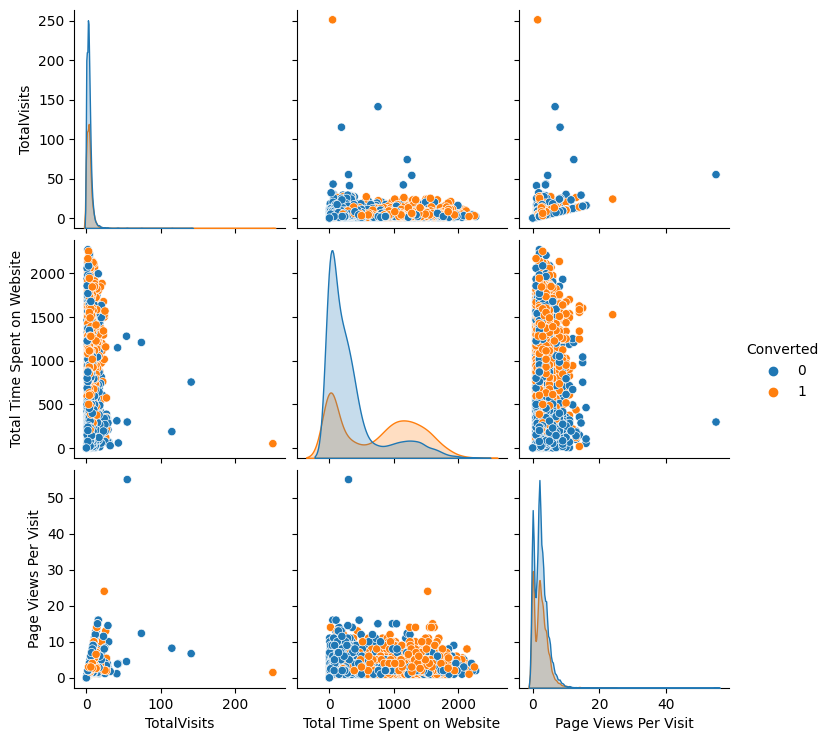

In [53]:
# Creating pairplot of all numeric variables

plt.figure(figsize=[20,20])
sns.pairplot(leads_df0.select_dtypes(include= ['int64','float64']), hue='Converted', diag_kind= 'kde')
plt.show()

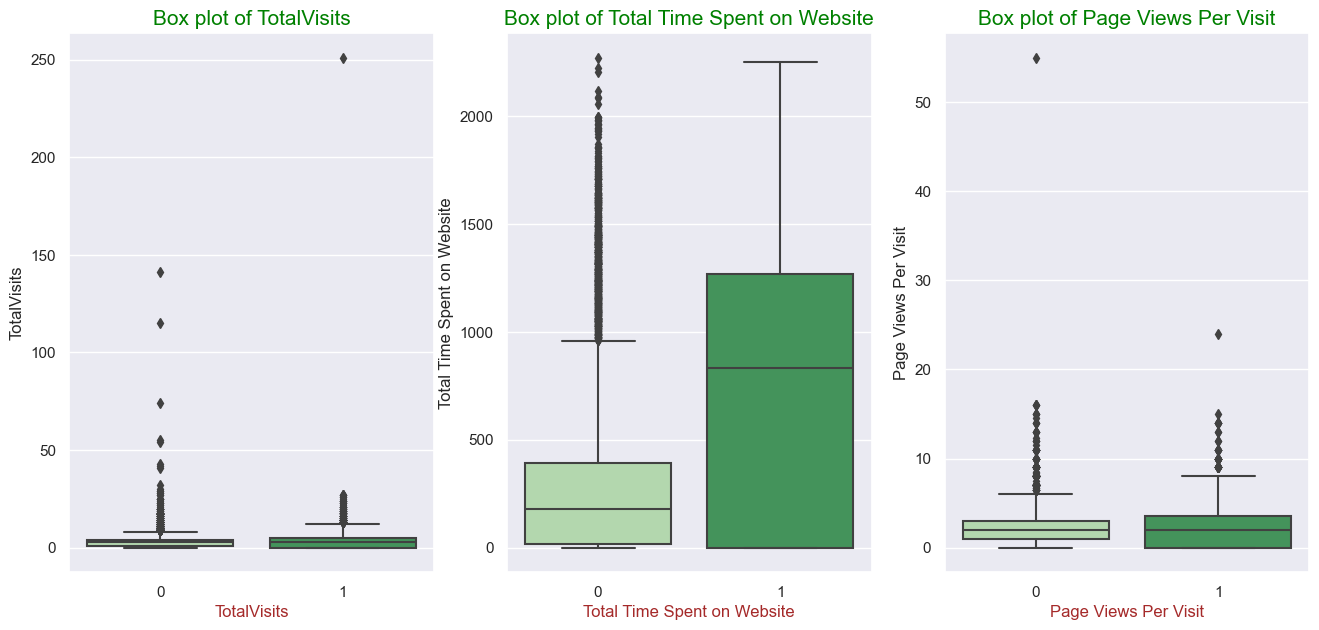

In [57]:
#Box plot of selected numeric columns

cols_to_check= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

sns.set(font_scale = 1)
plt.figure(figsize=[16,7])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= leads_df0, y= col, x= 'Converted', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 15, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})

Inferences 1:
Median value of 'Total Time Spent on Website' for converted Leads are considerably higher than the other group. Team should target those customers who are spending higher time on website. Those leads have higher odds of getting converted.
We can see high number of outliers in 'Total Visit' for Converted = 0. A good number of customers visiting the website higher number of times, but they are not opting for the course. Team should investigate the reason behind this. It could be because of financial problems, they are searching for other courses that is currently not offered by X Education, Getting other good options by competitors etc.
There are many outliers in 'Total Time Spent on Website' column for Converted= 0.

Removing Outliers

In [59]:
# Checking percentile values for 'Page Views Per Visit'

leads_df0['Page Views Per Visit'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([ 0.,  0.,  2.,  3.,  5.,  6.,  9., 55.])

In [61]:
# Removing observations having Page Views Per Visit > 9

leads_df0= leads_df0[~(leads_df0['Page Views Per Visit'] > 9)]

In [63]:
# Checking percentile values for 'TotalVisits'

leads_df0['TotalVisits'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([  0.  ,   0.  ,   3.  ,   5.  ,   7.  ,   9.  ,  16.73, 251.  ])

In [65]:
# Removing bservations having TotalVisits > 16.93

leads_df0= leads_df0[~(leads_df0['TotalVisits'] > 16.93)]

In [67]:
# Checking percentile values for 'Total Time Spent on Website'

leads_df0['Total Time Spent on Website'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([   0.  ,    0.  ,  246.  ,  930.  , 1378.  , 1558.35, 1840.27,
       2272.  ])

In [69]:
# Removing observations having 'Total Time Spent on Website' > 1840.27

leads_df0= leads_df0[~(leads_df0['Total Time Spent on Website'] > 1840.27)]

In [71]:
# Calculating % of observation dropped as outlier

print('% of observation dropped as outlier:', 100 - (leads_df0.shape[0] * 100/ 9240))

% of observation dropped as outlier: 2.7813852813852833


Visualizing Categorical Variables

In [73]:
# All relevant categorical columns
cat_cols= ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'Occupation',
       'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Tags']

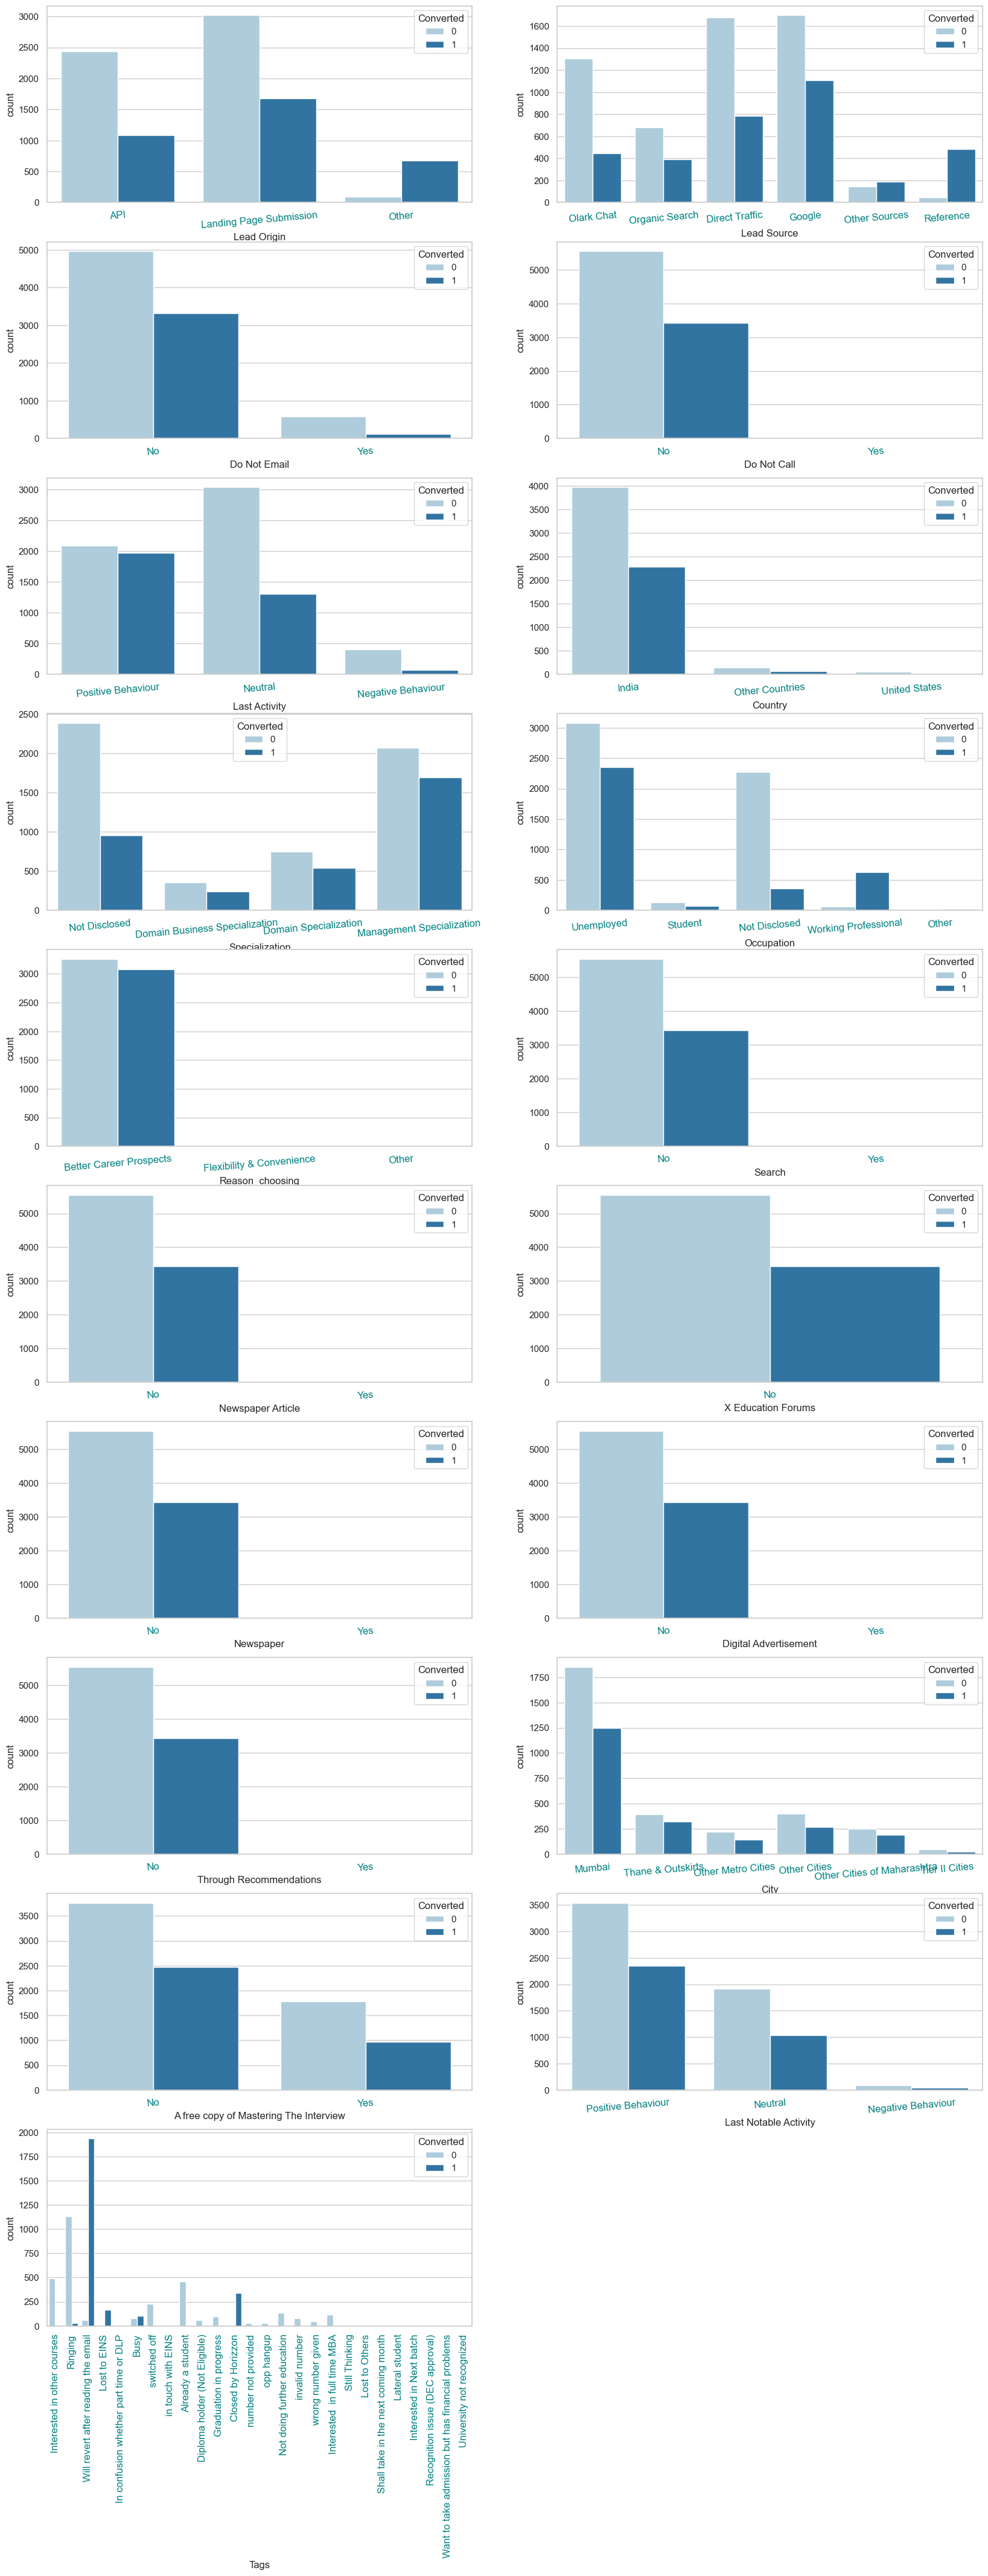

In [75]:
# Countplot of categorical columns
sns.set_style("whitegrid")
sns.color_palette("husl", 8)
plt.figure(figsize= [20,55])
for i, cat_col in enumerate(cat_cols, 1):
    title_text= f'Countplot of {cat_col}'
    ax= plt.subplot(11, 2,i)
    if cat_col== 'Tags':
        ax.set_xticklabels(title_text, rotation = 90, fontdict= {'fontsize': 12, 'color': 'Teal'})
    else:
        ax.set_xticklabels(title_text, rotation = 5, fontdict= {'fontsize': 12, 'color': 'Teal'})
    x_label= f'{cat_col}'
    sns.countplot(data= leads_df0, x= cat_col, hue= 'Converted', palette= 'Paired', ax=ax)

Inferences 2:
For 'Other' type Lead Origin there is a very high chance that the lead will be converted successfully.
'Reference' type of Lead Source has very high success rate. Team should consider referenced customers on priority. 'Other Sources' contributes very a smaller number of customers but has very good conversion rate. Customers coming through 'Organic Search' have also considerably higher chance of getting successfully converted.
Customers who have shown 'Positive Behaviour' in 'Last Activity' have considerably higher chance of getting converted successfully.
Most of the customers are from India and having Management Specializations.
People who have mentioned their specializations in the form have higher chance of opting for the course.
Most of the customers who have shown interest in the campaigns are Unemployed. Working Professional very high odds of successful conversion. Sales team should launch a campaign to reach more Working professionals.
People mentioned employment status during filling up the forms have higher chance of successful conversion.

Data Preparation

In [77]:
leads_df1= leads_df0.copy()
leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Positive Behaviour
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Ringing,NaN,No,Neutral
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Neutral
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Ringing,Mumbai,No,Positive Behaviour
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Positive Behaviour


In [79]:
leads_df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Occupation', 'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [81]:
## Droping unnecessary columns and columns generated by the Sales Team

leads_df1.drop(['Last Activity','Last Notable Activity','Tags', 'Prospect ID', 'Lead Number'], axis= 1, inplace= True)
leads_df1.shape

(8983, 20)

Train Test Split

In [83]:
# Performing train-test split

y= leads_df1.pop('Converted')
X= leads_df1
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .3, random_state= 100)

In [85]:
X_train.shape

(6288, 19)

In [87]:
y_train.shape

(6288,)

Missing Value Imputation (Statistical Imputation)
Previously we have already imputed missing values for few columns using Business Knowledge fo the imputation. For rest of the features we'll use Statistical Imputation. We'll impute categorical features with mode value and continuous features with median values.

In [89]:
# Checking missing value in different columns

leads_df1.isna().sum()

Lead Origin                                  0
Lead Source                                 35
Do Not Email                                 0
Do Not Call                                  0
TotalVisits                                133
Total Time Spent on Website                  0
Page Views Per Visit                       133
Country                                   2454
Specialization                               0
Occupation                                   0
Reason_choosing                           2648
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
City                                      3624
A free copy of Mastering The Interview       0
dtype: int64

In [91]:
# Imputing Lead Source in train and test data with mode value calculated on train data only

lead_source_imputer= X_train['Lead Source'].mode()[0]
X_train['Lead Source'].fillna(lead_source_imputer, inplace= True)
X_test['Lead Source'].fillna(lead_source_imputer, inplace= True)

In [93]:
# Imputing Country in train and test data with mode value calculated on train data only

country_imputer= X_train['Country'].mode()[0]
X_train.Country.fillna(country_imputer, inplace= True)
X_test.Country.fillna(country_imputer, inplace= True)

In [95]:
# Imputing 'Reason_choosing' in train and test data with mode value calculated on train data only

reason_imputer= X_train['Reason_choosing'].mode()[0]
X_train['Reason_choosing'].fillna(reason_imputer, inplace= True)
X_test['Reason_choosing'].fillna(reason_imputer, inplace= True)

In [97]:
# Imputing City in train and test data with mode value calculated on train data only

city_imputer= X_train['City'].mode()[0]
X_train.City.fillna(city_imputer, inplace= True)
X_test.City.fillna(city_imputer, inplace= True)

In [99]:
# Imputing TotalVisits in train and test data with median value calculated on train data only

total_visit_imputer= X_train['TotalVisits'].median()
X_train.TotalVisits.fillna(total_visit_imputer, inplace= True)
X_test.TotalVisits.fillna(total_visit_imputer, inplace= True)

In [101]:
# Imputing 'Page Views Per Visit' in train and test data with median value calculated on train data only

pageview_imputer= X_train['Page Views Per Visit'].median()
X_train['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)
X_test['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)

In [103]:
# Checking missing value in X_train
X_train.isna().any()

Lead Origin                               False
Lead Source                               False
Do Not Email                              False
Do Not Call                               False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Country                                   False
Specialization                            False
Occupation                                False
Reason_choosing                           False
Search                                    False
Newspaper Article                         False
X Education Forums                        False
Newspaper                                 False
Digital Advertisement                     False
Through Recommendations                   False
City                                      False
A free copy of Mastering The Interview    False
dtype: bool

In [105]:
# Checking missing value in X_test

X_test.isna().any()

Lead Origin                               False
Lead Source                               False
Do Not Email                              False
Do Not Call                               False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Country                                   False
Specialization                            False
Occupation                                False
Reason_choosing                           False
Search                                    False
Newspaper Article                         False
X Education Forums                        False
Newspaper                                 False
Digital Advertisement                     False
Through Recommendations                   False
City                                      False
A free copy of Mastering The Interview    False
dtype: bool

Below columns have only Yes and No values. Replacing Yes with 1 and No with 0. Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, A free copy of Mastering The Interview

In [107]:
# Performing encoding for binary categorical columns

binary_class_cols= ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

X_test[binary_class_cols]= X_test[binary_class_cols].replace({'No': 0, 'Yes': 1})
X_train[binary_class_cols]= X_train[binary_class_cols].replace({'No': 0, 'Yes': 1})

In [109]:
# Performing get_dummies() for rest of the nominal categorical columns

multi_cat_cols= ['Lead Origin','Lead Source','Country', 'Specialization', 'Reason_choosing', 'Occupation', 'City']

dummy_train= pd.get_dummies(X_train[multi_cat_cols], drop_first= True)
dummy_test= pd.get_dummies(X_test[multi_cat_cols], drop_first= True)

In [111]:
# Joining dummy_train dataframe with X_train and droping original columns

X_train= X_train.merge(dummy_train, how= 'inner', left_index= True, right_index= True)
X_train.drop(multi_cat_cols, axis=1, inplace= True)
X_train.shape

(6288, 34)

In [113]:
# Joining dummy_test dataframe with X_test and droping original columns

X_test= X_test.merge(dummy_test, how= 'inner', left_index= True, right_index= True)
X_test.drop(multi_cat_cols, axis=1, inplace= True)
X_test.shape

(2695, 34)

Performing MinMax Scaling on Train Data

In [115]:
# Performin MinMax Scaling on all numeric predictors

cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler= MinMaxScaler()
X_train[cols]= scaler.fit_transform(X_train[cols])
X_train[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7584,0.1875,0.231104,0.166667
671,0.0625,0.266993,0.111111
1676,0.6250,0.615008,0.555556
2161,0.3125,0.939641,0.555556
6976,0.0000,0.000000,0.000000


Performing Variance Thresholding

In [117]:
# Performing Variance Thresholding and removing columns having lower variance than threshold

var_t= VarianceThreshold(threshold= .001)
variance_thresh= var_t.fit(X_train)
col_ind= var_t.get_support()

# Below columns have very low variance
X_train.loc[:, ~col_ind].columns

Index(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Reason_choosing_Flexibility & Convenience'],
      dtype='object')

In [119]:
# Removing above columns from train and test dataset

X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]

In [121]:
X_train.shape

(6288, 27)

Checking pairwise correlation

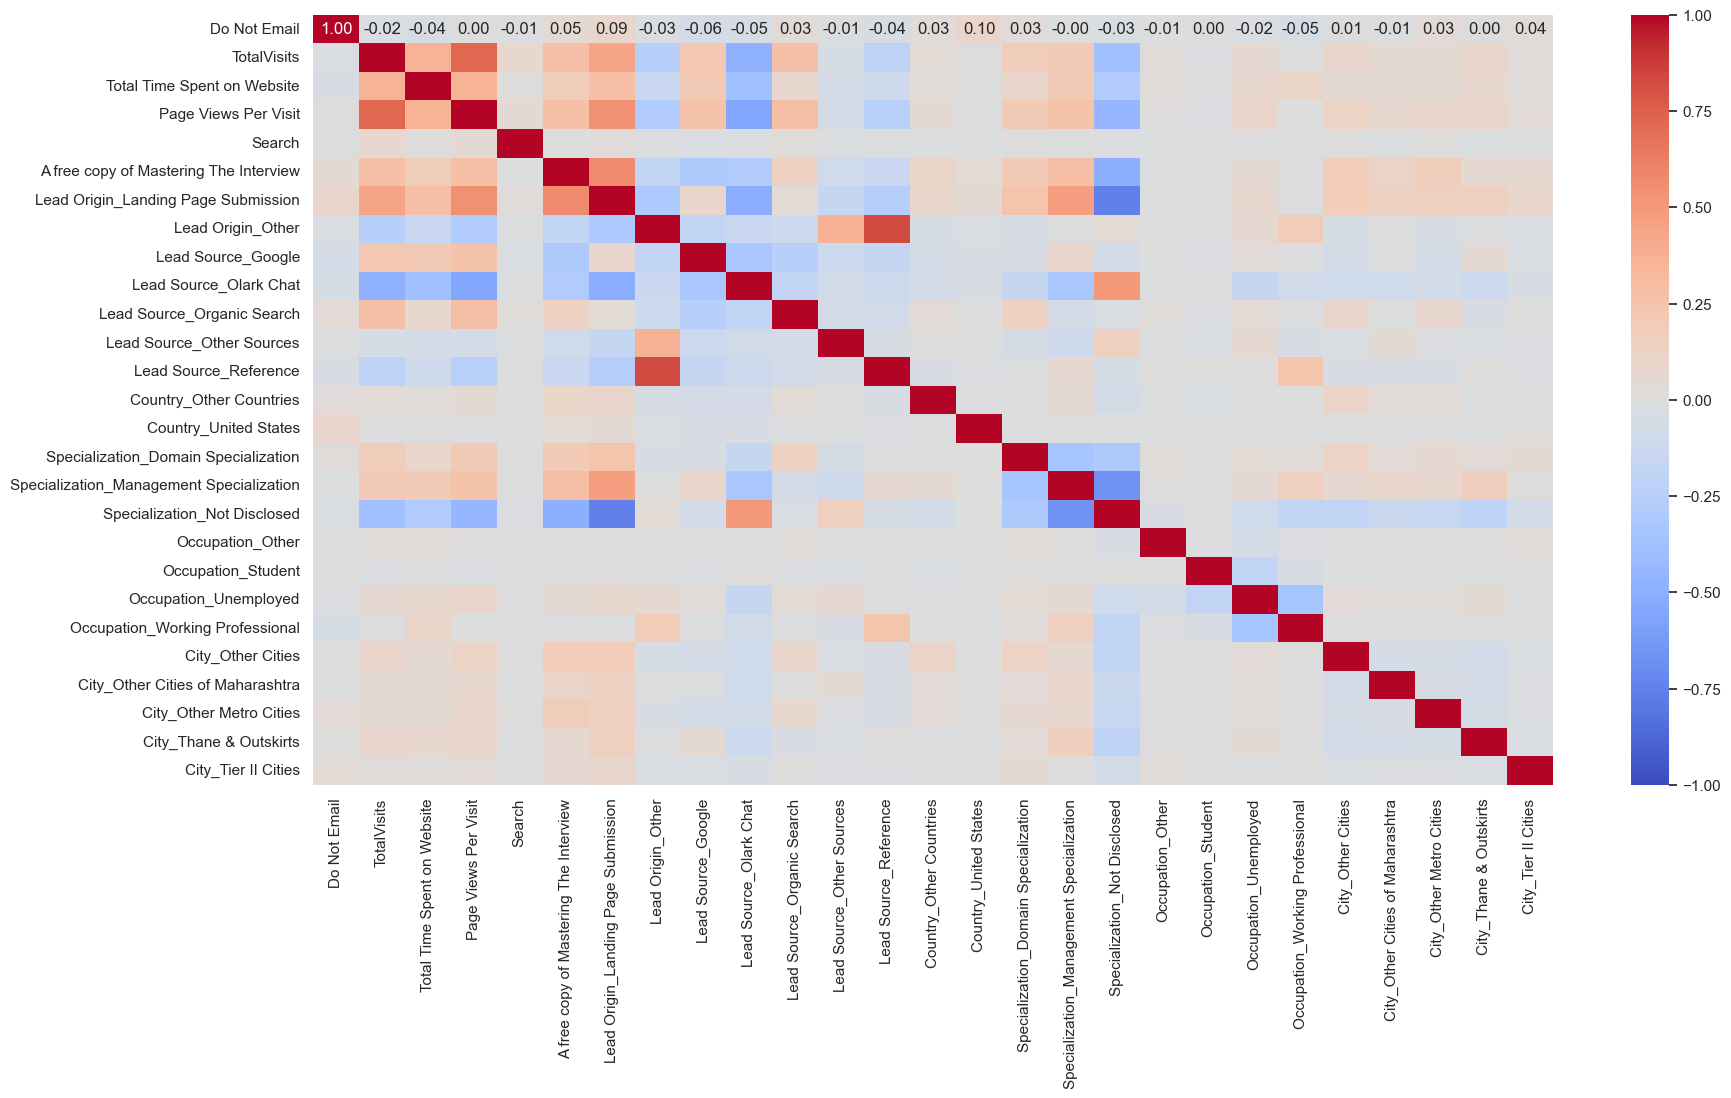

In [123]:
# Creating heatmap

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

In [125]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Country_Other Countries',
       'Country_United States', 'Specialization_Domain Specialization',
       'Specialization_Management Specialization',
       'Specialization_Not Disclosed', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

It can be seen that Lead Origin_Other has very high correlation (.82) with Lead Source_Reference. We'll drop Lead Source_Reference column. Lead_Origin_Landing Page Submission has very high correlation with Specialization_Not Disclosed. We'll drop Specialization_Not Disclosed column.

In [127]:
# Droping the columns from X_train and X_test

X_train.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)
X_test.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)

Model Building

In [131]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

# Corrected RFE initialization
rfe = RFE(estimator=lreg, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)  # Fit RFE to training data


In [133]:
# All Features with Rank
all_features= np.array(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Do Not Email', 'True', '1'],
       ['TotalVisits', 'True', '1'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'True', '1'],
       ['Search', 'False', '9'],
       ['A free copy of Mastering The Interview', 'False', '6'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Other', 'True', '1'],
       ['Lead Source_Google', 'False', '3'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'False', '8'],
       ['Lead Source_Other Sources', 'True', '1'],
       ['Country_Other Countries', 'True', '1'],
       ['Country_United States', 'False', '2'],
       ['Specialization_Domain Specialization', 'True', '1'],
       ['Specialization_Management Specialization', 'True', '1'],
       ['Occupation_Other', 'True', '1'],
       ['Occupation_Student', 'True', '1'],
       ['Occupation_Unemployed', 'True', '1'],
       ['Occupation_Working Professional', 'True', '1'],
       ['Cit

In [135]:
# Showing Top 16 features selected using RFE
top_16_features= list(all_features[all_features[:,1]=='True'][:,0])
top_16_features

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Other',
 'Lead Source_Olark Chat',
 'Lead Source_Other Sources',
 'Country_Other Countries',
 'Specialization_Domain Specialization',
 'Specialization_Management Specialization',
 'Occupation_Other',
 'Occupation_Student',
 'Occupation_Unemployed',
 'Occupation_Working Professional',
 'City_Tier II Cities']

Building 1st Model Using Top 16 Features

In [137]:
X_train_final= X_train[top_16_features]
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Tier II Cities
7584,0,0.1875,0.231104,0.166667,False,False,False,False,False,False,False,False,False,False,False,False
671,0,0.0625,0.266993,0.111111,False,False,False,False,False,False,False,False,False,True,False,False
1676,0,0.6250,0.615008,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
2161,0,0.3125,0.939641,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
6976,0,0.0000,0.000000,0.000000,False,False,True,False,False,False,False,False,False,True,False,False


In [141]:
import statsmodels.api as sm

# Convert boolean columns to integers
X_train_final = X_train_final.astype(int)

# Add a constant for the intercept
X_train_final = sm.add_constant(X_train_final)

# Build the GLM model
lreg1 = sm.GLM(y_train, X_train_final, family=sm.families.Binomial())
lreg_model_1 = lreg1.fit()  # Fit the model

# Print the summary to check the results
print(lreg_model_1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3332.9
Date:                Fri, 15 Nov 2024   Deviance:                       6665.8
Time:                        11:48:04   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2360
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

'City_Tier II Cities' and 'Country_Other Countries' have p value higher than .05. So their coefficient value is not statistically significant.
Let's see VIFs, to check if there is any multicollinearity present.

In [145]:
# Creating function to calculate VIFs

def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [147]:
# Calculating the VIFs for the 1st model

vif_calculation(X_train_final)

,Features,VIF
4,Lead Origin_Landing Page Submission,4.37
10,Specialization_Management Specialization,3.59
13,Occupation_Unemployed,2.35
9,Specialization_Domain Specialization,1.87
5,Lead Origin_Other,1.59
14,Occupation_Working Professional,1.34
7,Lead Source_Other Sources,1.23
6,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09
12,Occupation_Student,1.06


'Page Views Per Visit' and 'Lead Origin_Landing Page Submission' have bit higher VIF value but it's not too high. So first we'll remove 'City_Tier II Cities' feature from predictor ( as it has higher p value) and then we'll check again.

In [149]:
# Creating a function to show Confusion matrix and over all model accuracy

def get_metrics(X_train_final, lreg_model):
    y_train_pred= pd.DataFrame(lreg_model.predict(X_train_final), columns=['prob'])
    y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
    y_train_pred= y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)
    # Get Confusion matrix
    tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()
    print('Confusion Matrix:')
    print('True Negative:',tn, '    ','False Positive:',fp)
    print('False Negative:',fn,'    ','True Positive:',tp, '\n')
    # Checking the overall model accuracy
    print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

In [151]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_1)

Confusion Matrix:
True Negative: 3712      False Positive: 179
False Negative: 1506      True Positive: 891 

Overall model accuracy: 0.732029262086514


Building 2nd Model

In [153]:
# Removing 'City_Tier II Cities' from predictor
X_train_final.drop('City_Tier II Cities', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2161,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
6976,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [155]:
# Building 2nd Logistic Regression model using statsmodels

lreg2= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_2= lreg2.fit() # Fitting the model

# Checking the summary of our 2nd Logistic Regression model
print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3333.4
Date:                Fri, 15 Nov 2024   Deviance:                       6666.8
Time:                        11:50:04   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2359
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

'Country_Other Countries' has p value higher than .05. So its coefficient value is not statistically significant.
Let's see VIFs, to check if there is any multicollinearity present.

In [157]:
# Calculating the VIFs for the 2nd model

vif_calculation(X_train_final)

,Features,VIF
4,Lead Origin_Landing Page Submission,4.34
10,Specialization_Management Specialization,3.59
13,Occupation_Unemployed,2.35
9,Specialization_Domain Specialization,1.87
5,Lead Origin_Other,1.59
14,Occupation_Working Professional,1.34
7,Lead Source_Other Sources,1.23
6,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09
12,Occupation_Student,1.06


Still 'Page Views Per Visit' and 'Lead Origin_Landing Page Submission' have bit higher VIF value but it's not too high. So first we'll remove 'Country_Other Countries' feature from the predictors (as it has higher p value) and then we'll check again.

In [159]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_2)

Confusion Matrix:
True Negative: 3725      False Positive: 166
False Negative: 1511      True Positive: 886 

Overall model accuracy: 0.7333015267175572


Building 3rd Model

In [161]:
# Removing 'Country_Other Countries' from predictor
X_train_final.drop('Country_Other Countries', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2161,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
6976,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [163]:
# Building 3rd Logistic Regression model using statsmodels

lreg3= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_3= lreg3.fit() # Fitting the model

# Checking the summary of our 3rd Logistic Regression model
print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3336.1
Date:                Fri, 15 Nov 2024   Deviance:                       6672.3
Time:                        11:51:51   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2352
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [165]:
# Calculating the VIFs for the 3rd model

vif_calculation(X_train_final)


,Features,VIF
4,Lead Origin_Landing Page Submission,4.32
9,Specialization_Management Specialization,3.59
12,Occupation_Unemployed,2.35
8,Specialization_Domain Specialization,1.87
5,Lead Origin_Other,1.59
13,Occupation_Working Professional,1.34
7,Lead Source_Other Sources,1.23
6,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09
11,Occupation_Student,1.06


In [167]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_3)

Confusion Matrix:
True Negative: 3724      False Positive: 167
False Negative: 1510      True Positive: 887 

Overall model accuracy: 0.7333015267175572


If we compare this model with our model 2 then we can see there is very small chnage in confusion matrix, TP increased a bit and TN reduced by same amount. There is no significant reduction in overall model accuracy.

Building 4th model

In [169]:
# Removing 'Page Views Per Visit'  from predictor
X_train_final.drop('Page Views Per Visit' , axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2161,1,0,0,0,1,0,0,0,0,1,0,0,1,0
6976,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [171]:
# Building 4th Logistic Regression model using statsmodels

lreg4= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_4= lreg4.fit() # Fitting the model

# Checking the summary of our 4th Logistic Regression model
print(lreg_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3336.9
Date:                Fri, 15 Nov 2024   Deviance:                       6673.8
Time:                        11:53:12   Pearson chi2:                 6.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2350
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [173]:
# Calculating the VIFs for the 4th model

vif_calculation(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,4.32
8,Specialization_Management Specialization,3.59
11,Occupation_Unemployed,2.35
7,Specialization_Domain Specialization,1.87
4,Lead Origin_Other,1.59
12,Occupation_Working Professional,1.34
6,Lead Source_Other Sources,1.22
5,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09
10,Occupation_Student,1.06


Now, p values of all beta coefficients looks good. We can now say that all predictor coefficients are statistically significant. 'Lead Origin_Landing Page Submission' has bit higher VIF value (though it's lesser than 5). In our next model we'll drop 'Lead Origin_Landing Page Submission' and will check if that reduces overall model accuracy. If it does not impact overall model accuracy then it's better to remove this predictor.

In [175]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_4)

Confusion Matrix:
True Negative: 3724      False Positive: 167
False Negative: 1510      True Positive: 887 

Overall model accuracy: 0.7333015267175572


Building 5th model

In [177]:
# Removing 'Lead Origin_Landing Page Submission'  from predictor
X_train_final.drop('Lead Origin_Landing Page Submission' , axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,0,0,0,0,1,0,0,1,0
2161,1,0,0,0,0,0,0,0,1,0,0,1,0
6976,1,0,0,0,0,1,0,0,0,0,0,1,0


In [179]:
# Building 5th Logistic Regression model using statsmodels

lreg5= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_5= lreg5.fit() # Fitting the model

# Checking the summary of our 5th Logistic Regression model
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3351.4
Date:                Fri, 15 Nov 2024   Deviance:                       6702.8
Time:                        11:54:44   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2315
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [181]:
# Calculating the VIFs for the 5th model

vif_calculation(X_train_final)

,Features,VIF
10,Occupation_Unemployed,2.15
7,Specialization_Management Specialization,1.86
3,Lead Origin_Other,1.37
11,Occupation_Working Professional,1.34
6,Specialization_Domain Specialization,1.28
5,Lead Source_Other Sources,1.22
4,Lead Source_Olark Chat,1.13
0,Do Not Email,1.06
9,Occupation_Student,1.05
8,Occupation_Other,1.01


After removing Lead 'Origin_Landing Page Submission', VIF value of 'Specialization_Management Specialization' has also significantly decreased. So now we don't have any multicollinearity in our model. But p value of 'Specialization_Domain Specialization' beta coefficient is now higher than .05. We'll drop it in our next model from predictor variables.

In [185]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_5)

Confusion Matrix:
True Negative: 3781      False Positive: 110
False Negative: 1613      True Positive: 784 

Overall model accuracy: 0.7259860050890585


Building 6th model

In [189]:
# Removing 'Specialization_Domain Specialization'  from predictor

X_train_final.drop('Specialization_Domain Specialization' , axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,0,0,0,1,0,0,1,0
2161,1,0,0,0,0,0,0,1,0,0,1,0
6976,1,0,0,0,0,1,0,0,0,0,1,0


In [191]:
# Building 6th Logistic Regression model using statsmodels

lreg6= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_6= lreg6.fit() # Fitting the model

# Checking the summary of our 6th Logistic Regression model
print(lreg_model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3356.8
Date:                Fri, 15 Nov 2024   Deviance:                       6713.6
Time:                        11:56:26   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2302
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [193]:
# Calculating the VIFs for the 6th model

vif_calculation(X_train_final)

,Features,VIF
9,Occupation_Unemployed,1.75
6,Specialization_Management Specialization,1.68
3,Lead Origin_Other,1.36
10,Occupation_Working Professional,1.25
5,Lead Source_Other Sources,1.22
4,Lead Source_Olark Chat,1.11
0,Do Not Email,1.05
8,Occupation_Student,1.03
1,TotalVisits,1.00
7,Occupation_Other,1.00


Now, we can see that beta coefficient of 'Specialization_Management Specialization' has higher p value. Multicollinearity is not present in our model. We'll drop 'Specialization_Management Specialization' in our next model as its beta coefficient not statistically significant.

In [195]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_6)

Confusion Matrix:
True Negative: 3777      False Positive: 114
False Negative: 1605      True Positive: 792 

Overall model accuracy: 0.7266221374045801


Building 7th model

In [197]:
# Removing 'Specialization_Management Specialization'  from predictor

X_train_final.drop('Specialization_Management Specialization' , axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,1,0,0,0,0,0,0,0,0,0,0
671,1,0,0,0,0,0,0,0,0,1,0
1676,1,0,0,0,0,0,0,0,0,1,0
2161,1,0,0,0,0,0,0,0,0,1,0
6976,1,0,0,0,0,1,0,0,0,1,0


In [199]:
# Building 7th Logistic Regression model using statsmodels

lreg7= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_7= lreg7.fit() # Fitting the model

# Checking the summary of our 7th Logistic Regression model
print(lreg_model_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3362.2
Date:                Fri, 15 Nov 2024   Deviance:                       6724.4
Time:                        11:58:03   Pearson chi2:                 6.59e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2289
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [201]:
# Calculating the VIFs for the 7th model

vif_calculation(X_train_final)

,Features,VIF
3,Lead Origin_Other,1.36
8,Occupation_Unemployed,1.22
5,Lead Source_Other Sources,1.21
4,Lead Source_Olark Chat,1.09
9,Occupation_Working Professional,1.09
0,Do Not Email,1.05
7,Occupation_Student,1.01
1,TotalVisits,1.00
6,Occupation_Other,1.00
2,Total Time Spent on Website,NaN


After droping 'Specialization_Management Specialization', we can see that all the beta coefficients are now statistically significant also there is no multicolinearity present.

In [203]:
# Checking model evaluation metrics

get_metrics(X_train_final, lreg_model= lreg_model_7)

Confusion Matrix:
True Negative: 3777      False Positive: 114
False Negative: 1605      True Positive: 792 

Overall model accuracy: 0.7266221374045801


Calculating other Model Evaluation metrics

In [205]:
y_train_pred= pd.DataFrame(lreg_model_7.predict(X_train_final), columns=['prob'])
y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_train_pred= y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)
# Get Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()

In [207]:
# Checking Overall Model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

# Checking Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Checking Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Checking FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Checking Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# Checking Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Overall model accuracy: 0.7266221374045801
Sensitivity / Recall:  0.3304130162703379
Specificity:  0.9707016191210486
False Positive Rate:  0.029298380878951428
Positive Predictive Value:  0.8741721854304636
Positive Predictive Value:  0.701783723522854


Plotting the ROC Curve

In [209]:
# Craeting a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

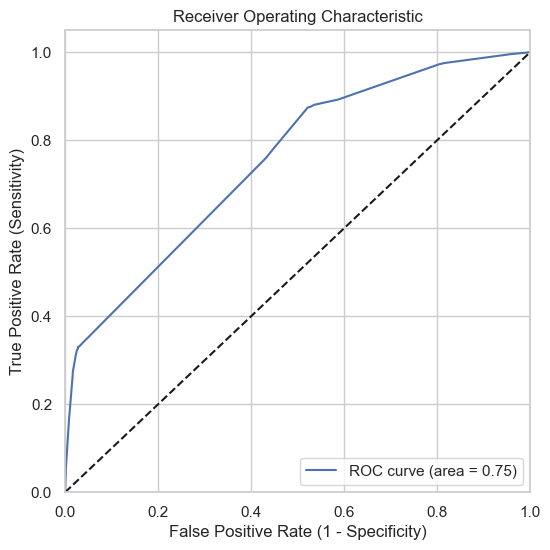

In [211]:
# Ploting ROC curve

fpr, tpr, thresholds= roc_curve(y_train_pred.Converted, y_train_pred.prob, drop_intermediate = False )
roc_plot(y_train_pred.Converted, y_train_pred.prob)

Finding Optimal Probability Cutoff Point

In [213]:
# Creating different label columns using different probability cutoffs

num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_Converted,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7584,0.154845,0,0,1,1,0,0,0,0,0,0,0,0
671,0.410332,0,1,1,1,1,1,1,0,0,0,0,0
1676,0.410332,0,1,1,1,1,1,1,0,0,0,0,0
2161,0.410332,0,1,1,1,1,1,1,0,0,0,0,0
6976,0.371294,0,0,1,1,1,1,0,0,0,0,0,0


In [215]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381202,1.000000,0.000000
0.1,0.1,0.410464,0.994159,0.050887
0.2,0.2,0.622296,0.880684,0.463120
0.3,0.3,0.625954,0.876095,0.471858
0.4,0.4,0.641062,0.760117,0.567720
0.5,0.5,0.726622,0.330413,0.970702
0.6,0.6,0.725986,0.321652,0.975071
0.7,0.7,0.724555,0.315811,0.976356
0.8,0.8,0.712945,0.273675,0.983552
0.9,0.9,0.637882,0.052149,0.998715


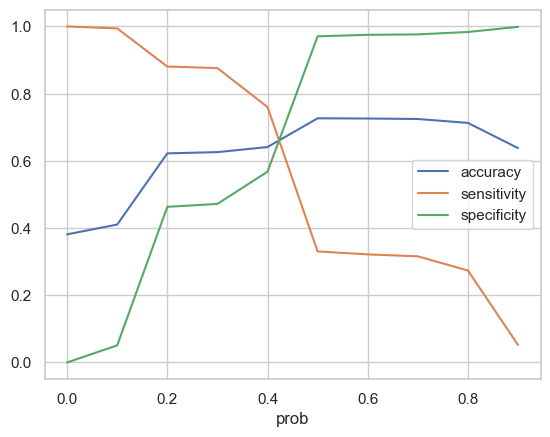

In [217]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs

plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()


Evaluating final model on train data

In [219]:
# Creating pred_final column and generating prediction based on probability cutoff .32

y_train_pred['pred_final']= y_train_pred.prob.map(lambda x: 1 if x > .32 else 0)

In [221]:
print('Model Evaluation Metrics on Train dataset')
print('#'* 50)

# Get Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# Checking Overall Model accuracy
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final))

# Checking Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Checking Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Checking FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Checking Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# Checking Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset
##################################################
Confusion Matrix:
True Negative: 1836      False Positive: 2055
False Negative: 297      True Positive: 2100 

Overall model accuracy: 0.6259541984732825
Sensitivity / Recall:  0.8760951188986232
Specificity:  0.471858134155744
False Positive Rate:  0.5281418658442559
Positive Predictive Value:  0.5054151624548736
Positive Predictive Value:  0.8607594936708861


Generating Lead Score on Train dataset

In [223]:
# Adding Lead Number from initial dataframe for better understanding

y_train_pred= y_train_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

# Generating Lead Score on Train dataset
y_train_pred['Lead Score']= y_train_pred.prob * 100
y_train_pred= y_train_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred.head(10)


,Lead Number,Converted,pred_Converted,prob,Lead Score
818,651812,1,1,0.994001,99.400117
5793,605316,1,1,0.989500,98.949999
2490,635809,1,1,0.989500,98.949999
8090,588000,1,1,0.989500,98.949999
8071,588051,1,1,0.989500,98.949999
5804,605271,1,1,0.989500,98.949999
8106,587918,1,1,0.989500,98.949999
364,656563,1,1,0.989500,98.949999
133,659158,1,1,0.989500,98.949999
8113,587890,1,1,0.989500,98.949999


Evaluating final model on test data

In [225]:
# Performing MinMax Scaling on test dataset

cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[cols]= scaler.transform(X_test[cols])
X_test[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7464,0.0000,0.000000,0.000000
987,0.0625,0.443176,0.111111
6975,0.1250,0.077760,0.222222
3406,0.0000,0.000000,0.000000
4500,0.0000,0.000000,0.000000


In [227]:
# Keeping only required columns in our test dataset

test_cols= list(X_train_final.columns)
test_cols.remove('const')
X_test= X_test[test_cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,0,0.0000,0.000000,False,True,False,False,False,False,False
987,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,0,0.0000,0.000000,False,True,False,False,False,False,False


In [263]:
# Adding constant in test dataset

X_test_final= sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False
987,1.0,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1.0,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,1.0,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False


In [267]:
# Check for non-numeric values
print(X_test_final.dtypes)

# Check for NaN or infinite values
print(X_test_final.isnull().sum())  # Check for missing values
print(np.isinf(X_test_final).sum())  # Check for infinite values


const                              float64
Do Not Email                         int64
TotalVisits                        float64
Total Time Spent on Website        float64
Lead Origin_Other                     bool
Lead Source_Olark Chat                bool
Lead Source_Other Sources             bool
Occupation_Other                      bool
Occupation_Student                    bool
Occupation_Unemployed                 bool
Occupation_Working Professional       bool
dtype: object
const                              0
Do Not Email                       0
TotalVisits                        0
Total Time Spent on Website        0
Lead Origin_Other                  0
Lead Source_Olark Chat             0
Lead Source_Other Sources          0
Occupation_Other                   0
Occupation_Student                 0
Occupation_Unemployed              0
Occupation_Working Professional    0
dtype: int64
const                              0
Do Not Email                       0
TotalVisits        

In [269]:
# Fill or remove NaN values
X_test_final = X_test_final.fillna(0)  # Replace NaN with 0 (or use a better imputation strategy)

# Ensure all values are numeric
X_test_final = X_test_final.astype(float)


In [271]:
# Compare columns in X_test_final and training data
print(X_test_final.columns)
print(lreg_model_7.model.exog_names)  # Features used in the model

# Reorder and select matching columns
X_test_final = X_test_final[lreg_model_7.model.exog_names]


Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Other', 'Lead Source_Olark Chat',
       'Lead Source_Other Sources', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')
['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Other', 'Lead Source_Olark Chat', 'Lead Source_Other Sources', 'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed', 'Occupation_Working Professional']


In [273]:
# Compare columns in X_test_final and training data
print(X_test_final.columns)
print(lreg_model_7.model.exog_names)  # Features used in the model

# Reorder and select matching columns
X_test_final = X_test_final[lreg_model_7.model.exog_names]


Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Other', 'Lead Source_Olark Chat',
       'Lead Source_Other Sources', 'Occupation_Other', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')
['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Other', 'Lead Source_Olark Chat', 'Lead Source_Other Sources', 'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed', 'Occupation_Working Professional']


In [275]:
# Make predictions
y_test_pred = pd.DataFrame(lreg_model_7.predict(X_test_final), columns=['prob'])
print(y_test_pred.head())


          prob
7464  0.134567
987   0.090081
6975  0.166609
3406  0.793736
4500  0.134567


Generating Lead Score on Test dataset

In [277]:
# Merging y_test and y_test_pred

y_test_pred= y_test_pred.merge(y_test, how= 'inner', left_index= True, right_index= True)

In [279]:
# Creating prediction based on probability cut off .32
y_test_pred['pred_Converted']= y_test_pred.prob.map(lambda x: 1 if x> .32 else 0)
y_test_pred.head()

,prob,Converted,pred_Converted
7464,0.134567,0,0
987,0.090081,0,0
6975,0.166609,0,0
3406,0.793736,1,1
4500,0.134567,0,0


In [281]:
# Adding Lead Number from initial dataframe for better understanding
y_test_pred= y_test_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

In [283]:
# Generating Lead Score on Test dataset
y_test_pred['Lead Score']= y_test_pred.prob * 100
y_test_pred= y_test_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_test_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
4613,615524,1,1,0.990869,99.086904
2984,631268,1,1,0.990869,99.086904
470,655352,1,1,0.990544,99.054432
8057,588097,0,1,0.990544,99.054432
79,659710,1,1,0.990544,99.054432
2660,634029,1,1,0.990544,99.054432
8074,588037,1,1,0.990544,99.054432
8063,588075,1,1,0.990544,99.054432
3428,627462,1,1,0.990544,99.054432
7187,594369,1,1,0.989860,98.986020


Evaluating final model on test data

In [285]:
print('Model Evaluation Metrics on Test dataset')
print('#'* 50)

# Get Confusion matrix
TN,FP,FN,TP= confusion_matrix(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


# Checking Overall Model accuracy

print('Overall model accuracy:', accuracy_score(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted))

# Checking Sensitivity of our final model
print('Sensitivity / Recall: ',TP / float(TP+FN))

# Checking Specificity of our final model
print('Specificity: ', TN / float(TN+FP))

# Checking FPR (False Positive Rate) of our final model (1- specificity)
print('False Positive Rate: ',FP/ float(TN+FP))

# Checking Positive Predictive Value 
print('Positive Predictive Value: ',TP / float(TP+FP))

# Checking Negative Predictive Value
print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Test dataset
##################################################
Confusion Matrix:
True Negative: 802      False Positive: 858
False Negative: 129      True Positive: 906 

Overall model accuracy: 0.6337662337662338
Sensitivity / Recall:  0.8753623188405797
Specificity:  0.4831325301204819
False Positive Rate:  0.516867469879518
Positive Predictive Value:  0.5136054421768708
Positive Predictive Value:  0.8614393125671321
